<a href="https://colab.research.google.com/github/Tory9696/Pars/blob/main/ParsStackRLE_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install stackapi matplotlib pandas

Загружаем данные...
Всего загружено вопросов: 1000
Найдено вопросов с проблемами: 550


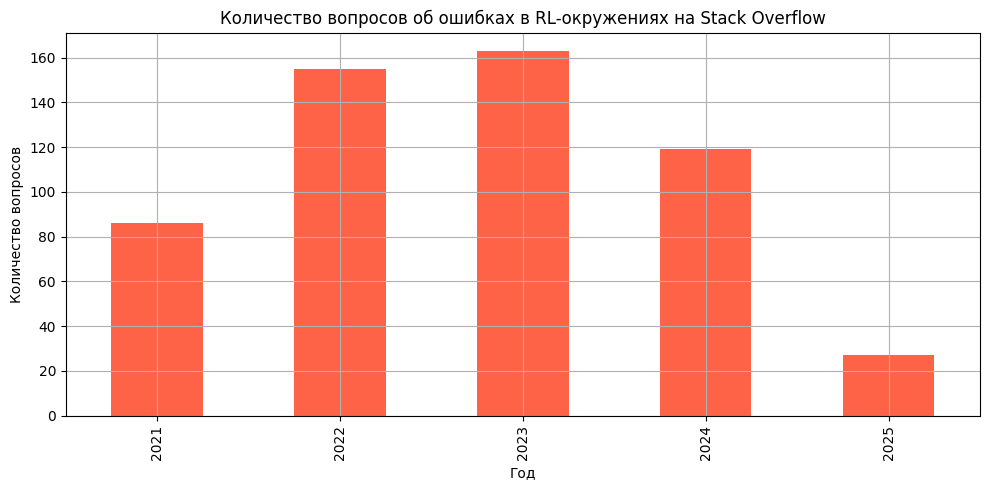

In [ ]:
from stackapi import StackAPI
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Ключевые слова, связанные с проблемами в RL-окружениях
keywords = ['gym', 'mujoco', 'pybullet', 'nan', 'version', 'crash', 'incompatible', 'box2d', 'reset', 'runtime error', 'segfault']

# Подключение к Stack Overflow
SITE = StackAPI('stackoverflow')
SITE.max_pages = 10  # Можно увеличить
SITE.page_size = 100

# Сбор вопросов по тегу 'reinforcement-learning'
print("Загружаем данные...")
questions = SITE.fetch('questions', tagged='reinforcement-learning', sort='creation', order='desc', filter='withbody')
print(f"Всего загружено вопросов: {len(questions['items'])}")

# Фильтрация по ключевым словам
filtered = []
for q in questions['items']:
    combined_text = (q.get('title', '') + ' ' + q.get('body', '')).lower()
    if any(kw in combined_text for kw in keywords):
        filtered.append({
            'title': q.get('title', ''),
            'creation_date': datetime.utcfromtimestamp(q.get('creation_date'))
        })

print(f"Найдено вопросов с проблемами: {len(filtered)}")

# Подготовка данных по годам
df = pd.DataFrame(filtered)
df['year'] = df['creation_date'].dt.year
year_counts = df.groupby('year').size()

# Построение графика
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar', color='tomato')
plt.title('Количество вопросов об ошибках в RL-окружениях на Stack Overflow')
plt.xlabel('Год')
plt.ylabel('Количество вопросов')
plt.grid(True)
plt.tight_layout()
plt.show()